In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic
## Optimisation

In [2]:
from scipy.optimize import minimize

Minimise $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)

In [4]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [5]:
res.x

array([2.99999999])

Minimise $f(x,y) = (x-1)^2 + (y-2.5)^2$ subject to
$$
x-2y+2 \geq 0 \\
-x-2y+6 \geq 0 \\
-x+2y+2 \geq 0 \\
x \geq 0 \\
y \geq 0
$$

- 2D function takes in vector $x$
- Constraints must be spcified as $g_i(x) \geq 0 $
- Bounds specified as rectangular

In [6]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2}) # constraints (inequalities), a tuple of dictionaries
bnds = ((0, None), (0, None)) # bounds (lower and upper), a tuple of tuples
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [7]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

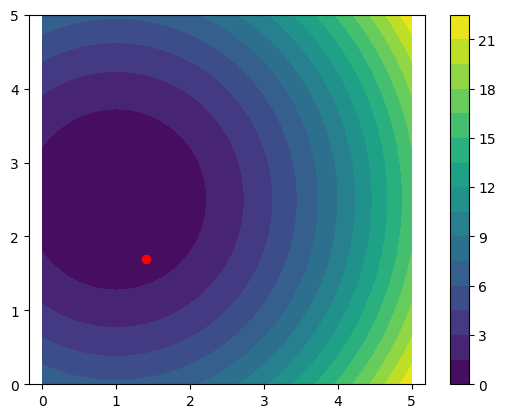

In [8]:
x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)
xv, yv = np.meshgrid(x, y)
zv = f([xv, yv])
plt.contourf(xv, yv, zv, 20)
plt.axis('equal')
plt.colorbar()
plt.plot(res.x[0], res.x[1], 'ro')


In [9]:
# minimize?

## Interpolation
Suppose you have the following data

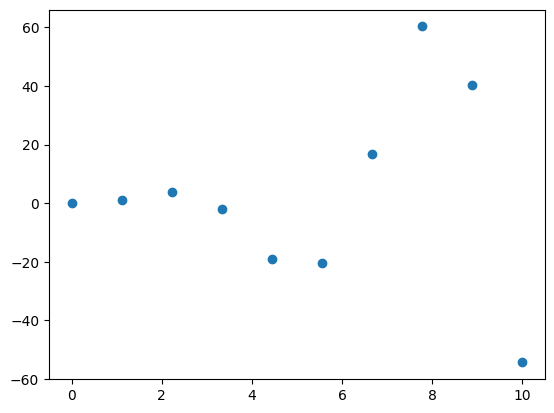

In [10]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between

In [11]:
from scipy.interpolate import interp1d

In [12]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

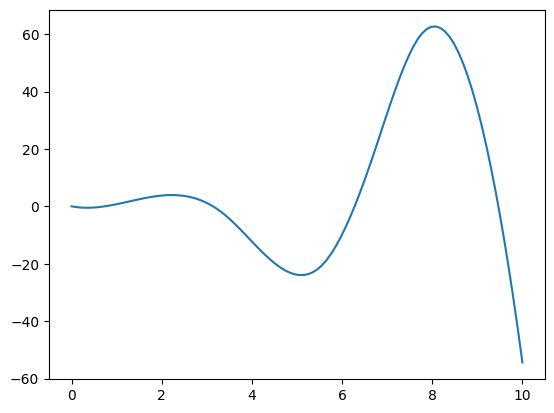

In [13]:
plt.plot(x_dense, y_dense)

# Curve Fitting
Trivial Example

In [14]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

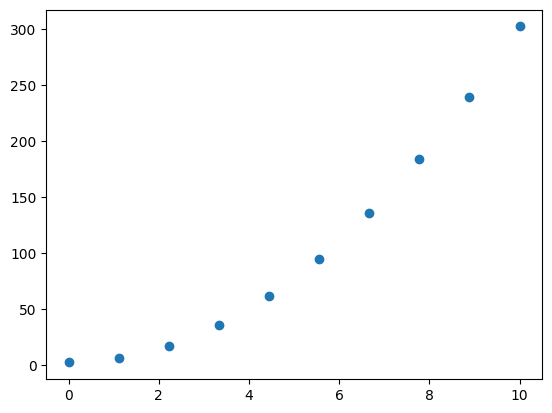

In [15]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is to determine the values of $a$ and $b$

In [16]:
from scipy.optimize import curve_fit # curve fitting

def func(x, a, b):
    return a*x**2 + b  # function to fit

popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1)) # p0 is the initial guess for the parametersccoscoscl;co



In [17]:
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [18]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

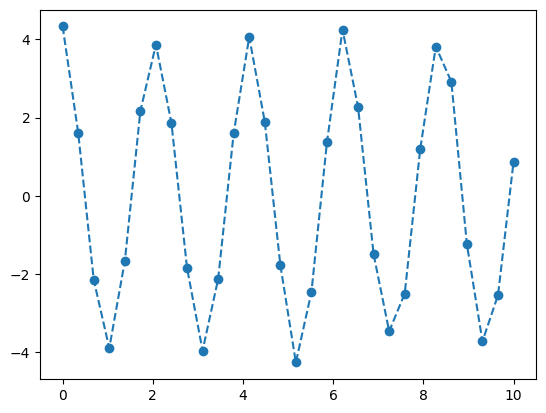

In [19]:
plt.plot(t_data, y_data, 'o--')

$\omega = 2 \pi\ f$, $f = 1/T$, and $T \approx$ seconds. Thus good initial guess is
- $\omega = 2 \pi (1/2) = \pi$
- $A = 4$
- $\phi = 0$

In [20]:
def func(t, A, w, phi):
    return A * np.cos(w*t + phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [21]:
A, w, phi = popt

In [22]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

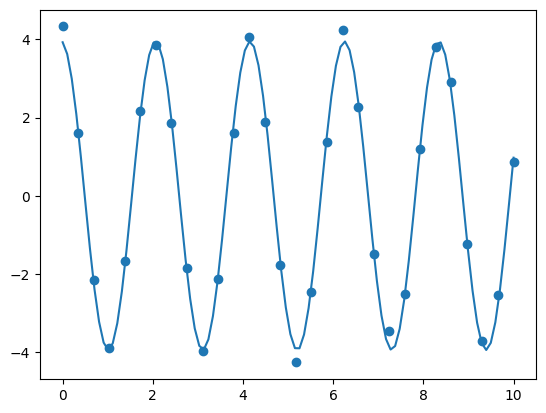

In [23]:
plt.scatter(t_data, y_data)
plt.plot(t, y) # the fitted curve

The parameters

In [24]:
popt

array([3.94836219, 2.9989952 , 0.10411352])

The estimated error on the parameters

In [25]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575702])

# Calculus
## Differentiation

In [26]:
from scipy.misc import derivative

In [27]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0, 1, 100)

/tmp/ipykernel_2334/2080230970.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
/tmp/ipykernel_2334/2080230970.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


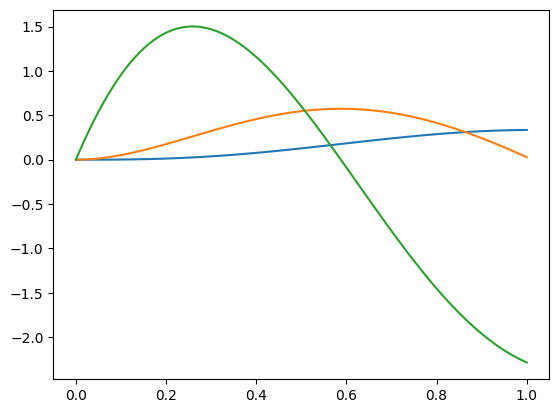

In [28]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

## Integration
Simple integrals
$$\int_0^1 x^2 \sin(2x) e^{-x} dx$$

In [29]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [30]:
integral_error

1.6162822047366225e-15

Double integrals
$$ \int_0^1 \int_{-x}^{x^2} \sin(x + y^2) dy dx $$

In [31]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [32]:
integral

0.315802507240474

# Differential equations
## First order ODEs
Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{1cm} v(0) = 0$$

In [33]:
from scipy.integrate import odeint

All information about differential equation

In [34]:
def dvdt(v, t):
    return 3*v**2 - 5 # setting alpha = 3 and beta = 5
v0 = 0 # initial condition


Solve the differential equation

Note: this equation is separable and the analytic solution is $v(t) = -\sqrt{\tfrac{5}{3}}\tanh(\sqrt{15}t)$

In [35]:
t = np.linspace(0, 1, 100) # time grid
sol = odeint(dvdt, v0, t)

In [36]:
sol.shape

(100, 1)

In [37]:
sol.T.shape

(1, 100)

In [38]:
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

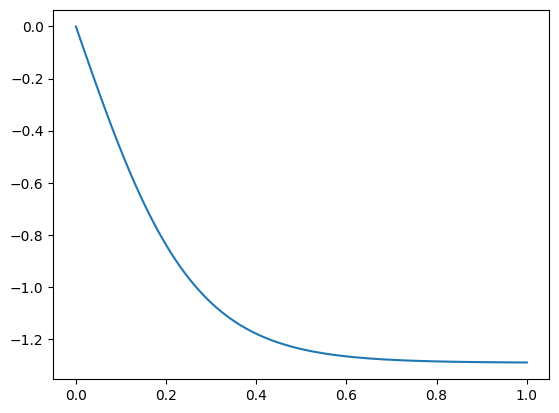

In [39]:
plt.plot(t, sol.T[0]) # transpose and take the first element
#plt.plot(t, -np.sqrt(5/3) * np.tanh(np.sqrt(15) * t)) # analytical solution

In [40]:
x = np.array([[1],[2],[3]]) # a 2d array with 3 rows and 1 column
x

array([[1],
       [2],
       [3]])

In [41]:
x[:,0] # the first column

array([1, 2, 3])

In [42]:
x.T # transpose, a 2d array with 1 row and 3 columns

array([[1, 2, 3]])

In [43]:
x.T[0] # the first row

array([1, 2, 3])

**Coupled first order ODEs**

$$ y'_1 = y_1 + y_2^2 + 3x \hspace{1cm} y_1(0) = 0$$
$$ y'_2 = 3y_1 + y_2^3 - \cos(x) \hspace{1cm} y_2(0) = 0$$

Letting $S = (y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S = (y_1, y_2)$ and $x$.

In [44]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [45]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [46]:
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [47]:
sol.shape # each row is a solution at a time point

(100, 2)

In [48]:
y1 = sol.T[0]
y2 = sol.T[1]

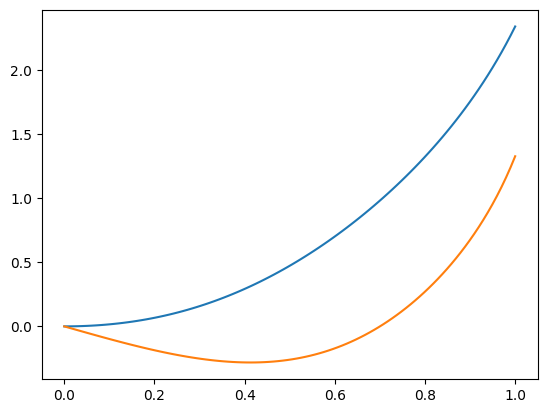

In [49]:
plt.plot(x, y1)
plt.plot(x, y2)

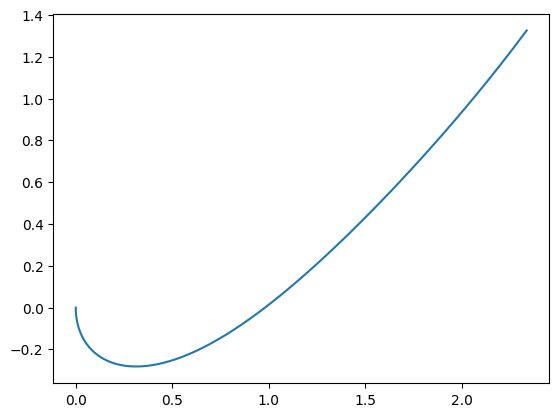

In [50]:
plt.plot(y1, y2)

## Second Order ODEs

Equation for a pendulum
$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into to coupled first oder ODE**s. The same thing goes for higher order ODEs.

Define $\omega  = d\theta/dt$ so that one has the following coupled ODEs

$$d\theta/dt = \omega$$
$$d\omega/dt = -\sin(\theta)$$

Let $S = (\theta, \omega)$

Note: $\omega$ is the angular velocity

In [51]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
            -np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [52]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

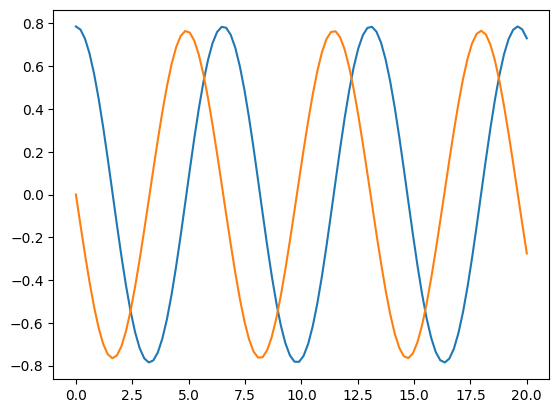

In [53]:
plt.plot(t, theta) # plot theta against time
plt.plot(t, omega) # plot omega against time

(-0.8636513876333467,
 0.8639243324941528,
 -0.8417794536873536,
 0.8418543604756757)

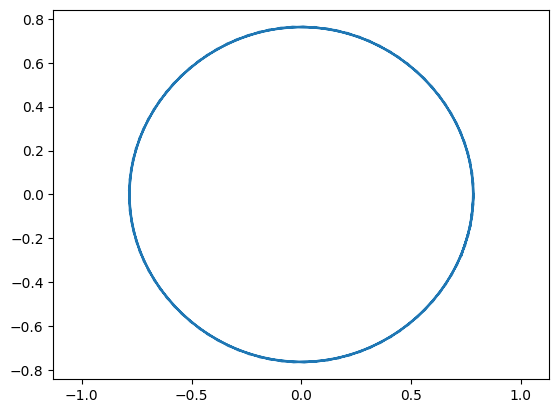

In [54]:
plt.plot(theta, omega)
plt.axis('equal')

# Fourier Transforms


The discrete Fourier transform is defined as
$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$
    
    
* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$"

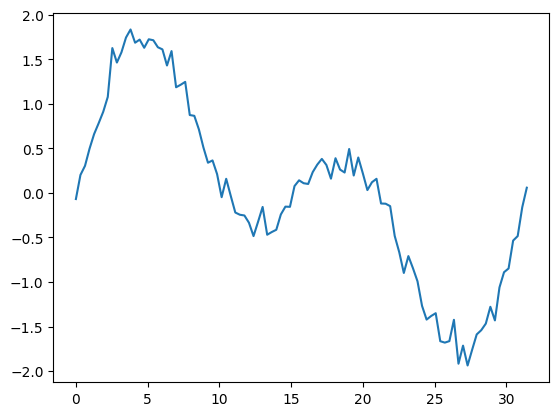

In [55]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(t, x)

In [56]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]

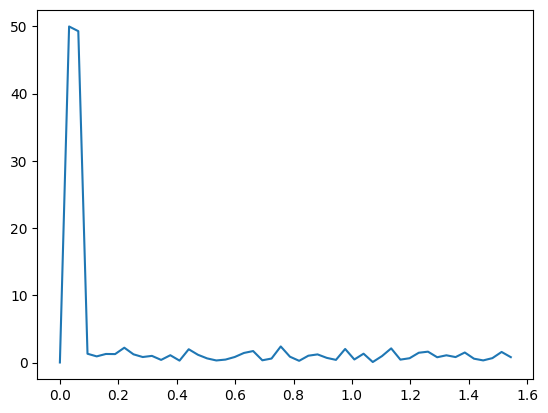

In [57]:
plt.plot(f, np.abs(y))

# Linear algebra
## Basics
Triangular matrices
$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$ 

In [58]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
            [2, 1, 0, 0,],
            [1, 0, 1, 0],
            [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplits matrices (constant diagonals)
$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$ 

In [59]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10]) # first column
r = np.array([1, -1, -2, -3]) # first row
b = np.array([1, 2, 2, 5])
x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

## Eigenvalue problems
Eigenvalue problems can be solved using numpy

In [60]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda \vec{x} $$ 

In [61]:
d = 3*np.ones(4) # diagonal
e = -1*np.ones(3) # off-diagonal
w, v = eigh_tridiagonal(d, e)

In [62]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [63]:
v.T[1]

array([ 0.60150096,  0.37174803, -0.37174803, -0.60150096])

In [64]:
A@v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [65]:
w[1]*v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

# Statistics

**Example 1:** $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \qquad 0 \leq x \leq 1$$

In [66]:
from scipy.stats import beta

Basic statistics

In [67]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

In [68]:
mean

0.44642857142857145

Probability distribution plotting

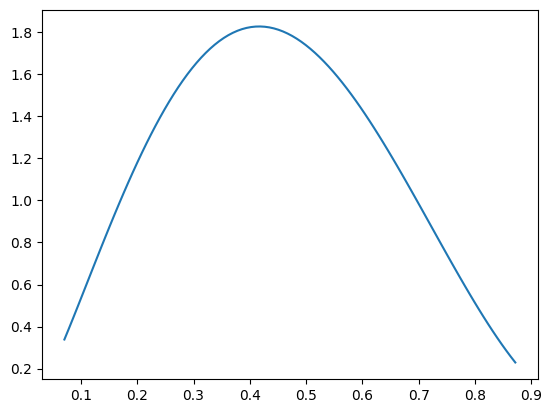

In [69]:
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

**Example 2:** Gaussian distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp} \left( -\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [70]:
from scipy.stats import norm

In [71]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')


In [72]:
var

4.0

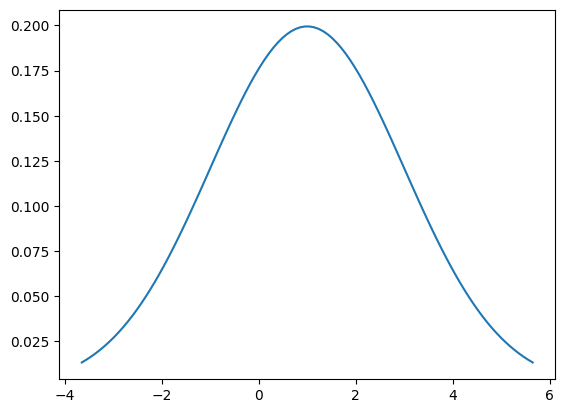

In [73]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

In [76]:
norm.ppf(0.975, mu, sigma)

4.919927969080108